In [1]:
#following https://www.geeksforgeeks.org/ipl-score-prediction-using-deep-learning/?ref=rp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [2]:
ipl_df = pd.read_csv('./ipl_data.csv')

In [ ]:
ipl_df.head()

In [3]:
#Unimportant features
ipl_df = ipl_df.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis=1)


In [4]:
#Prediction is to predict the total 
train_x=ipl_df.drop(['total'],axis=1)
train_y = ipl_df['total']



In [5]:
train_x.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [6]:
#Label encoder

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
#Encoder for categorical data
#Initialisation
venue = LabelEncoder()
batting_team = LabelEncoder()
bowling_team = LabelEncoder()
batter = LabelEncoder()
bowler=LabelEncoder()

In [8]:
#Transform the categorical variable with label encoding
train_x['venue'] = venue.fit_transform(train_x['venue'])
train_x['bat_team'] = batting_team.fit_transform(train_x['bat_team'])
train_x['bowl_team'] = bowling_team.fit_transform(train_x['bowl_team'])
train_x['batsman']  = batter.fit_transform(train_x['batsman'])
train_x['bowler'] = bowler.fit_transform(train_x['bowler'])

In [19]:

X_train, X_test, Y_train, Y_test = train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [20]:
#Feature Scaling
scaler=MinMaxScaler()

#fit scaler on training data

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [21]:
#Define NN
#(X_train_scale.shape[1] -> gets the column number
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scale.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')
])
#Huber loss function
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam',loss =huber_loss)


In [22]:
model.fit(X_train_scale,Y_train,epochs=20,batch_size=32,validation_data=(X_test_scale,Y_test))

Epoch 1/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 42.4615 - val_loss: 22.1024
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.4442 - val_loss: 22.1011
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.4579 - val_loss: 22.1524
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.3338 - val_loss: 21.9410
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.1916 - val_loss: 22.7311
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.1310 - val_loss: 21.8202
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.4009 - val_loss: 21.8622
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.1346 - val_loss: 21.8078
Epoch 9/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.2597 - val_loss: 21.8924
Epoch 10/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.0012 - val_loss: 21.6924
Epoch 11/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21.9357 - val_loss: 21.9297
Epoch 12

<Axes: >

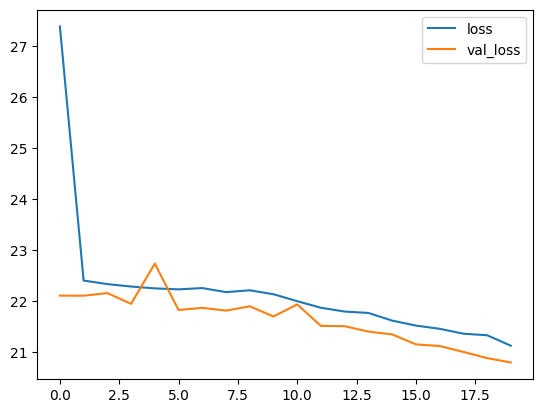

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [24]:
#Predict
preds = model.predict(X_test_scale)

mean_absolute_error(Y_test,preds)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


21.283058465256342

In [33]:
#Create interactive widget
import ipywidgets as widgets
from IPython.display import display,clear_output

import warnings
warnings.filterwarnings("ignore")

venue_picker = widgets.Dropdown(options=ipl_df['venue'].unique().tolist(),description = 'Venue')
bat_team_picker = widgets.Dropdown(options=ipl_df['bat_team'].unique().tolist(),description ='Select Batting Team')
bowl_team_picker = widgets.Dropdown(options=ipl_df['bowl_team'].unique().tolist(),description ='Select Bowling Team')
batsman_picker = widgets.Dropdown(options=ipl_df['batsman'].unique().tolist(),description ='Select Batsman')
bowler_picker = widgets.Dropdown(options=ipl_df['bowler'].unique().tolist(),description ='Select Bowler')

predict_button = widgets.Button(description ="Predict Score")

def predict_score(value):

    with output:
        clear_output()
        decoded_venue =venue.transform([venue_picker.value])
        decoded_bat_team =batting_team.transform([bat_team_picker.value])
        decoded_bowling =bowling_team.transform([bowl_team_picker.value])
        decoded_bowler =bowler.transform([bowler_picker.value])
        decoded_batter = batter.transform([batsman_picker.value])
        input = np.array([decoded_venue,decoded_bat_team,decoded_bowling,decoded_bowler,decoded_batter])
        input=input.reshape(1,5)
        input=scaler.transform(input)
        predicted_score=model.predict(input)
        predicted_score=int(predicted_score[0,0])
        print(predicted_score)









        




In [34]:
#Initialise the widget

predict_button.on_click(predict_score)
output =widgets.Output()
display(venue_picker,bat_team_picker,bowl_team_picker,batsman_picker,bowler_picker,predict_button,output)

Dropdown(description='Venue', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali', …

Dropdown(description='Select Batting Team', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajastha…

Dropdown(description='Select Bowling Team', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi …

Dropdown(description='Select Batsman', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moham…

Dropdown(description='Select Bowler', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL …

Button(description='Predict Score', style=ButtonStyle())

Output()